<a href="https://colab.research.google.com/github/DeependraParichha1004/NLP/blob/main/AiCaption_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch 
import transformers
import gradio
import re 
from transformers import AutoTokenizer, ViTFeatureExtractor, VisionEncoderDecoderModel 
import PIL 
from PIL import Image


In [5]:
device='cpu'
encoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
decoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
model_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
feature_extractor = ViTFeatureExtractor.from_pretrained(encoder_checkpoint)
tokenizer = AutoTokenizer.from_pretrained(decoder_checkpoint)
model = VisionEncoderDecoderModel.from_pretrained(model_checkpoint).to(device)

/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [7]:
# import numpy as np
# def predict(image_path,num,max_length=64, num_beams=4):
#   # all_captions=[]
#   image=Image.open(image_path)
#   image = image.convert('P')
#   image=np.expand_dims(-1,image)
#   image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)
#   clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
#   # for i in range(num):
#     # caption_ids = model.generate(image, max_length = max_length)[0]
#     # caption_text = clean_text(tokenizer.decode(caption_ids))
#     # all_captions.append(caption_text)
#   caption_ids = model.generate(image, max_length = max_length)[0]
#   caption_text = clean_text(tokenizer.decode(caption_ids))
#   return caption_text

In [7]:
# def image_augmentation(path,num):
#   for i in range(num):
#     # path='/content/download (2).png'
#     image = cv2.imread(path)
#     # print(image.shape)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     transform = A.Compose(
#         [A.CLAHE(),
#         #  A.RandomRotate90(),
#         A.Transpose(),
#         A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50,
#                             rotate_limit=45, p=.75),
#         #  A.Blur(blur_limit=3),
#         #  A.OpticalDistortion(),
#         #  A.GridDistortion(),
#         A.HueSaturationValue()])

#     augmented_image = transform(image=image)['image']
#     # plt.savefig('/content/')
#     # visualize(augmented_image)
#     return augmented_image

In [46]:
# PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')

In [49]:
# def predict(image_path,max_length=64, num_beams=4):
#   # image=Image.open(image_path)
#   aug_img=image_augmentation(image_path,1)
#   visualize(aug_img)
#   image = Image.fromarray(np.uint8(aug_img)).convert('RGB')
#   # image = image.convert('RGB')
#   image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)
#   clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
#   caption_ids = model.generate(image, max_length = max_length)[0]
#   caption_text = clean_text(tokenizer.decode(caption_ids))
#   return caption_text

In [51]:
# import random
# def image_augmentation1(img):
#   imgs=[]
#   ran=[1,2,3,4,5,6]
#   no=random.choice(ran)
#   for i in range(no):
#     # path='/content/download (2).png'
#     # image = cv2.imread(path)
#     # print(image.shape)
#     image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     transform = A.Compose(
#         [A.CLAHE(),
#         #  A.RandomRotate90(),
#         A.Transpose(),
#         A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50,
#                             rotate_limit=45, p=.75),
#         #  A.Blur(blur_limit=3),
#         #  A.OpticalDistortion(),
#         #  A.GridDistortion(),
#         A.HueSaturationValue()])

#     augmented_image = transform(image=image)['image']
#     # plt.savefig('/content/')
#     # visualize(augmented_image)
#     imgs.append(augmented_image)
#   return imgs

In [59]:

# def predict1(image):#,max_length=64, num_beams=4
#   # image=Image.open(image_path)
#   caps=list()
#   aug_img=image_augmentation1(image)
#   # len(aug_img)
#   for img in aug_img:
#     # visualize(aug_img)
#     img_1 = Image.fromarray(np.uint8(img)).convert('RGB')
#     # image = image.convert('RGB')
#     img_1 = feature_extractor(img_1, return_tensors="pt").pixel_values.to(device)
#     clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
#     caption_ids = model.generate(img_1, max_length = 64)[0]
#     caption_text = clean_text(tokenizer.decode(caption_ids))
#     # print('text',type(caption_text))
#     caps.append(caption_text)
#   # print(caps)
#   return caption_text

In [58]:
# caps=predict1(image,3)
# caps

['a pair of shoes on a table ',
 'a man with a beard is standing in front of a white wall ',
 'a man with a beard is posing for a picture ']

In [ ]:
# import gradio as gr
# demo=gr.Interface(fn=predict1, inputs=["image","number"], outputs="text")
# # demo = gr.Interface(fn=predict1, inputs=["image",gr.Dropdown(["one","multiple"])], outputs="text")
# # demo = gr.Interface(fn=predict1, inputs=["image","number"], outputs="text")
# demo.launch()

In [6]:
# !pip install albumentations
import albumentations as A
import cv2
import matplotlib.pyplot as plt
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [47]:
import cv2
import albumentations as A
image = cv2.imread('/content/image1.jpg')
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = A.Compose(
    [A.CLAHE(),
    #  A.RandomRotate90(),
     A.Transpose(),
     A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50,
                        rotate_limit=45, p=.75),
    #  A.Blur(blur_limit=3),
    #  A.OpticalDistortion(),
    #  A.GridDistortion(),
     A.HueSaturationValue()])

augmented_image = transform(image=image)['image']
# visualize(augmented_image)

(131, 204, 3)


In [8]:
def image_augmentation2(ima,n_caps):
  imgs=[]
  for i in range(n_caps):
    # path='/content/download (2).png'
    # image = cv2.imread(path)
    # print(image.shape)
    imag = cv2.cvtColor(ima, cv2.COLOR_BGR2RGB)

    transform = A.Compose(
        [A.CLAHE(),
        #  A.RandomRotate90(),
        A.Transpose(),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50,
                            rotate_limit=45, p=.75),
        #  A.Blur(blur_limit=3),
        #  A.OpticalDistortion(),
        #  A.GridDistortion(),
        A.HueSaturationValue()])

    augmented_image = transform(image=imag)['image']
    # plt.savefig('/content/')
    # visualize(augmented_image)
    imgs.append(augmented_image)
  return imgs

In [9]:
# cap2=image_augmentation2(image,2)
# print(len(cap2))
# for img in cap2:
#   visualize(img)
#   image = Image.fromarray(np.uint8(img)).convert('RGB')
#   # image = image.convert('RGB')
#   image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)
#   clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
#   caption_ids = model.generate(image, max_length = 64)[0]
#   caption_text = clean_text(tokenizer.decode(caption_ids))
#   print(caption_text)

In [23]:
# def predict2(ima,n_caps):#,max_length=64, num_beams=4
#   # image=Image.open(image_path)
#   aug_img=image_augmentation2(ima,int(n_caps))
#   caps=[]
  
#   for img in aug_img:
#     # print('caps',caps)
#     visualize(img)
#     image = Image.fromarray(np.uint8(img)).convert('RGB')
#     # image = image.convert('RGB')
#     image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)
#     clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
#     caption_ids = model.generate(image, max_length = 64)[0]
#     caption_text = clean_text(tokenizer.decode(caption_ids))
#     caps.append(caption_text)
#   return caps

In [51]:
def predict2(ima,n_caps):#,max_length=64, num_beams=4
  # image=Image.open(image_path)
  aug_img=image_augmentation2(ima,int(n_caps))
  caps=''
  
  for img in aug_img:
    # print('caps',caps)
    visualize(img)
    image = Image.fromarray(np.uint8(img)).convert('RGB')
    # image = image.convert('RGB')
    image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)
    clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
    caption_ids = model.generate(image, max_length = 64)[0]
    caption_text = clean_text(tokenizer.decode(caption_ids))
    caps+='\n'+caption_text
  for i in range(1):
    print(caps,end=" ")
  # return caps

SyntaxError: ignored


a woman is laying on the ground with her arms crossed 
a man with a tie and a shirt on 
a man with a beard and a tie  

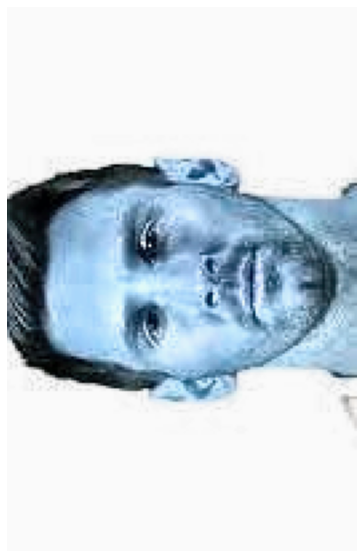

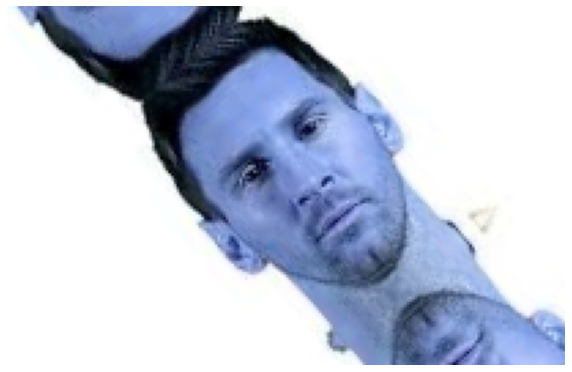

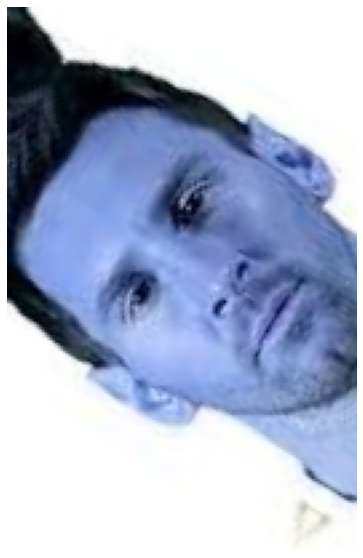

In [52]:
predict2(image,3)

In [ ]:
a = ["hello my name is deependra","my pet name is deependra"]

b=[print(i, end=' ') for i in a] 
c=[print(i) for i in b]
c[:-2]

In [89]:
# def image_classifier(inp):
#   return type(inp)
demo2=gr.Interface(fn=predict2, inputs=["image","number"], outputs="text")
# demo = gr.Interface(fn=predict1, inputs=["image",gr.Dropdown(["one","multiple"])], outputs="text")
# demo = gr.Interface(fn=predict1, inputs=["image","number"], outputs="text")
demo2.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [27]:
import gradio as gr
with gr.Blocks(css=".gradio-container {background-color: grey}") as demo:
  img=gr.Image()
  a=gr.Number(label="No of captions")
  
  out=gr.Textbox()  
  btn=gr.Button("Click")
  def display(num,img):
    return int(num)
  btn.click(predict2,inputs=[img,a],outputs=out)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [30]:
line=''
line+='sjsk,'
line+='hsgh'
line

'sjsk,hsgh'

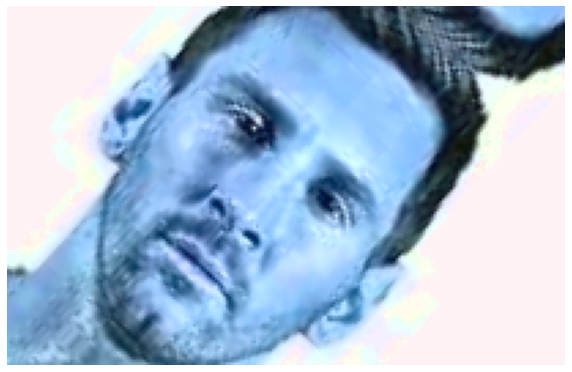

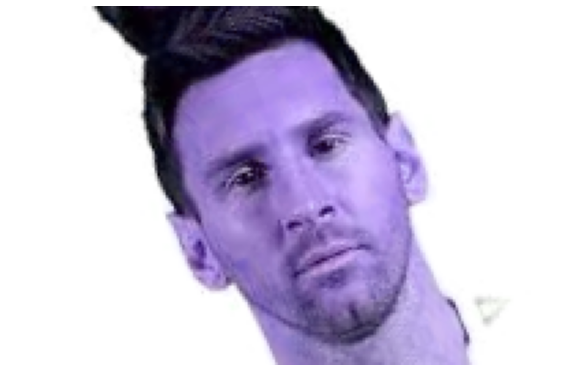

In [39]:
cap2=image_augmentation2(image,2)
line=''
for img in cap2:
  visualize(img)
  image = Image.fromarray(np.uint8(img)).convert('RGB')
  # image = image.convert('RGB')
  image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)
  clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
  caption_ids = model.generate(image, max_length = 64)[0]
  caption_text = clean_text(tokenizer.decode(caption_ids))
  line+=caption_text+','

In [40]:
line

'a man with a beard and a tie ,a man with a beard and a tie ,'

In [42]:
line.split(',')

['a man with a beard and a tie ', 'a man with a beard and a tie ', '']

In [54]:
st1='\nmy name is dependra \nhashsg'
for i in range(1):
  str1=(str1,end="")
  return (st1,end=" ")

SyntaxError: ignored